# DELHIVERY 
Delhivery, a rapidly expanding logistics firm in India, offers dependable transportation services across diverse sectors, serving both retail customers and large-scale ecommerce platforms. Their strategic goal is to establish cutting-edge operational capabilities, aiming to reduce delivery times and optimize logistics efficiency.

With this dataset, the firm seeks to identify operational efficiencies and explore variations between estimated and actual delivery times/distances.

## About the dataset

## Column Profiling:

data - tells whether the data is testing or training data

trip_creation_time – Timestamp of trip creation

route_schedule_uuid – Unique Id for a particular route schedule

route_type – Transportation type

FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or 
drop-offs along the way.

Carting: Handling system consisting of small vehicles (carts)

trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

source_center - Source ID of trip origin

source_name - Source Name of trip origin

destination_cente – Destination ID

destination_name – Destination Name

od_start_time – Trip start time

od_end_time – Trip end time

start_scan_to_end_scan – Time taken to deliver from source to destination

is_cutoff – Unknown field

cutoff_factor – Unknown field

cutoff_timestamp – Unknown field

actual_distance_to_destination – Distance in Kms between source and destination warehouse

actual_time – Actual time taken to complete the delivery (Cumulative)

osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a 
given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
factor – Unknown field

segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

segment_factor – Unknown field

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
df = pd.read_csv(r"C:\Users\HP\Documents\delhivery_data.csv")
pd.DataFrame(df)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,9/20/2018 4:27,10.435660,14,11,11.9653,1.272727,14,11,11.9653,1.272727
1,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,9/20/2018 4:17,18.936842,24,20,21.7243,1.200000,10,9,9.7590,1.111111
2,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,01:19.5,27.637279,40,28,32.5395,1.428571,16,7,10.8152,2.285714
3,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,9/20/2018 3:39,36.118028,62,40,45.5620,1.550000,21,12,13.0224,1.750000
4,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,9/20/2018 3:33,39.386040,68,44,54.2181,1.545455,6,5,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,24:28.4,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),24:28.4,...,9/20/2018 21:57,45.258278,94,60,67.9280,1.566667,12,12,8.1858,1.000000
144863,training,24:28.4,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),24:28.4,...,9/20/2018 21:31,54.092531,120,76,85.6829,1.578947,26,21,17.3725,1.238095
144864,training,24:28.4,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),24:28.4,...,9/20/2018 21:11,66.163591,140,88,97.0933,1.590909,20,34,20.7053,0.588235
144865,training,24:28.4,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),24:28.4,...,9/20/2018 20:53,73.680667,158,98,111.2709,1.612245,17,27,18.8885,0.629630


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  int64  
 12  is_cutoff       

# Data cleaning and Feature extraction

In [52]:
df.loc[df.trip_uuid=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,9/20/2018 4:27,10.435660,14,11,11.9653,1.272727,14,11,11.9653,1.272727
1,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,9/20/2018 4:17,18.936842,24,20,21.7243,1.200000,10,9,9.7590,1.111111
2,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,01:19.5,27.637279,40,28,32.5395,1.428571,16,7,10.8152,2.285714
3,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,9/20/2018 3:39,36.118028,62,40,45.5620,1.550000,21,12,13.0224,1.750000
4,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,9/20/2018 3:33,39.386040,68,44,54.2181,1.545455,6,5,3.9153,1.200000
5,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),47:45.2,...,9/20/2018 6:15,10.403038,15,11,12.1171,1.363636,15,11,12.1171,1.363636
6,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),47:45.2,...,9/20/2018 5:47,18.045481,44,17,21.2890,2.588235,28,6,9.1719,4.666667
7,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),47:45.2,...,9/20/2018 5:25,28.061896,65,29,35.8252,2.241379,21,11,14.5362,1.909091
8,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),47:45.2,...,9/20/2018 5:15,38.939167,76,39,47.1900,1.948718,10,10,11.3648,1.000000
9,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),47:45.2,...,9/20/2018 4:49,43.595802,102,45,53.2334,2.266667,26,6,6.0434,4.333333


# Merging rows by TripID

In [53]:
df['segment_id'] = df['trip_uuid']+df['source_center']+df['destination_center']
df['segment_actual_time'] = df.groupby('segment_id')['segment_actual_time'].cumsum()
df['segment_osrm_time'] = df.groupby('segment_id')['segment_osrm_time'].cumsum()
df['segment_osrm_distance'] = df.groupby('segment_id')['segment_osrm_distance'].cumsum()

In [54]:
df.loc[df['trip_uuid']=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_id
0,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,10.435660,14,11,11.9653,1.272727,14,11,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB
1,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,18.936842,24,20,21.7243,1.200000,24,20,21.7243,1.111111,trip-153741093647649320IND388121AAAIND388620AAB
2,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,27.637279,40,28,32.5395,1.428571,40,27,32.5395,2.285714,trip-153741093647649320IND388121AAAIND388620AAB
3,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,36.118028,62,40,45.5620,1.550000,61,39,45.5619,1.750000,trip-153741093647649320IND388121AAAIND388620AAB
4,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,39.386040,68,44,54.2181,1.545455,67,44,49.4772,1.200000,trip-153741093647649320IND388121AAAIND388620AAB
5,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),47:45.2,...,10.403038,15,11,12.1171,1.363636,15,11,12.1171,1.363636,trip-153741093647649320IND388620AABIND388320AAA
6,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),47:45.2,...,18.045481,44,17,21.2890,2.588235,43,17,21.2890,4.666667,trip-153741093647649320IND388620AABIND388320AAA
7,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),47:45.2,...,28.061896,65,29,35.8252,2.241379,64,28,35.8252,1.909091,trip-153741093647649320IND388620AABIND388320AAA
8,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),47:45.2,...,38.939167,76,39,47.1900,1.948718,74,38,47.1900,1.000000,trip-153741093647649320IND388620AABIND388320AAA
9,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),47:45.2,...,43.595802,102,45,53.2334,2.266667,100,44,53.2334,4.333333,trip-153741093647649320IND388620AABIND388320AAA


In [55]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_id'],
      dtype='object')

In [56]:
merge_segment = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'trip_uuid':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'last',
              'actual_distance_to_destination':'last',
              'actual_time':'last',
              'osrm_time':'last',
              'osrm_distance':'last',
              'segment_actual_time':'last',
              'segment_osrm_time':'last',
              'segment_osrm_distance':'last'
}

In [57]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_id'],
      dtype='object')

In [58]:
erge_segment = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'trip_uuid':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'last',
              'actual_distance_to_destination':'last',
              'actual_time':'last',
              'osrm_time':'last',
              'osrm_distance':'last',
              'segment_actual_time':'last',
              'segment_osrm_time':'last',
              'segment_osrm_distance':'last'
}

In [59]:
segment_df = df.sort_values(by=['segment_id', 'actual_time']).groupby('segment_id').agg({
    'actual_time': ['sum', 'mean', 'max', 'min']
}).reset_index()

segment_df.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in segment_df.columns]

segment_df.head()

,segment_id_,actual_time_sum,actual_time_mean,actual_time_max,actual_time_min
0,trip-153671041653548748IND209304AAAIND000000ACB,6484,360.222222,732,50
1,trip-153671041653548748IND462022AAAIND209304AAA,9198,438.000000,830,43
2,trip-153671042288605164IND561203AABIND562101AAA,96,32.000000,47,18
3,trip-153671042288605164IND572101AAAIND561203AAB,303,50.500000,96,14
4,trip-153671043369099517IND000000ACBIND160002AAC,2601,216.750000,611,36


In [60]:
filtered_df = df[df['trip_uuid'] == 'trip-153741093647649320']

filtered_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_id
0,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,10.435660,14,11,11.9653,1.272727,14,11,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB
1,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,18.936842,24,20,21.7243,1.200000,24,20,21.7243,1.111111,trip-153741093647649320IND388121AAAIND388620AAB
2,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,27.637279,40,28,32.5395,1.428571,40,27,32.5395,2.285714,trip-153741093647649320IND388121AAAIND388620AAB
3,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,36.118028,62,40,45.5620,1.550000,61,39,45.5619,1.750000,trip-153741093647649320IND388121AAAIND388620AAB
4,training,35:36.5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),21:32.4,...,39.386040,68,44,54.2181,1.545455,67,44,49.4772,1.200000,trip-153741093647649320IND388121AAAIND388620AAB


In [61]:
merge_trip = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'sum',
              'actual_distance_to_destination':'sum',
              'actual_time':'sum',
              'osrm_time':'sum',
              'osrm_distance':'sum',
              'segment_actual_time':'sum',
              'segment_osrm_time':'sum',
              'segment_osrm_distance':'sum'}

In [62]:
trip_df = df.sort_values(['trip_uuid', 'od_start_time']).groupby('trip_uuid').agg({
    'actual_time': ['sum', 'mean', 'max', 'min']
}).reset_index()

trip_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in trip_df.columns]

trip_df.head()

,trip_uuid_,actual_time_sum,actual_time_mean,actual_time_max,actual_time_min
0,trip-153671041653548748,15682,402.102564,830,43
1,trip-153671042288605164,399,44.333333,96,14
2,trip-153671043369099517,112225,1260.955056,2736,36
3,trip-153671046011330457,82,41.000000,59,23
4,trip-153671052974046625,556,79.428571,147,34


In [63]:
trip_df.shape

(14817, 5)

# Handling missing values

In [64]:
#checking for missing values in the data
trip_df.isna().sum()

trip_uuid_          0
actual_time_sum     0
actual_time_mean    0
actual_time_max     0
actual_time_min     0
dtype: int64

In [65]:
# Removing trips with missing values in source/destination
trip_df.dropna(inplace=True)
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trip_uuid_        14817 non-null  object 
 1   actual_time_sum   14817 non-null  int64  
 2   actual_time_mean  14817 non-null  float64
 3   actual_time_max   14817 non-null  int64  
 4   actual_time_min   14817 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 578.9+ KB


In [66]:
trip_df.isna().sum()

trip_uuid_          0
actual_time_sum     0
actual_time_mean    0
actual_time_max     0
actual_time_min     0
dtype: int64

# Outliers

In [67]:
numeric_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance']

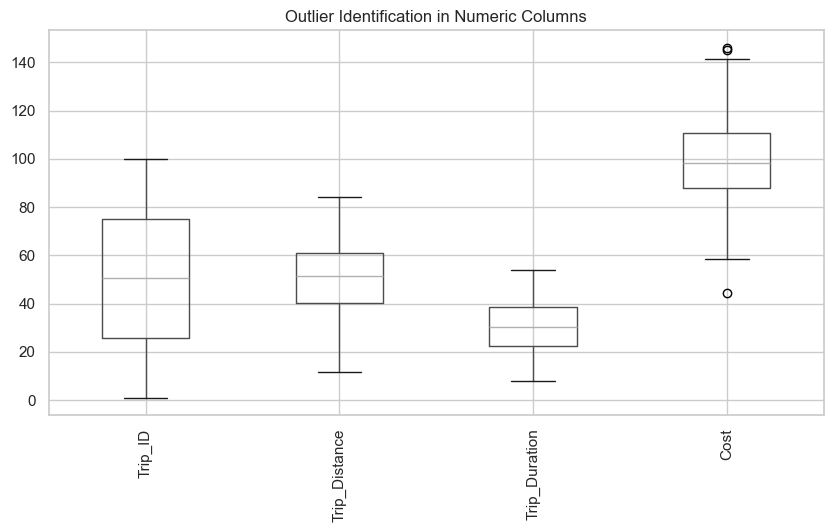

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting the random seed for reproducibility
np.random.seed(0)

# Creating a sample DataFrame with numeric and non-numeric columns
sample_data = {
    'Trip_ID': np.arange(1, 101),
    'Trip_Distance': np.random.normal(loc=50, scale=15, size=100),
    'Trip_Duration': np.random.normal(loc=30, scale=10, size=100),
    'Cost': np.random.normal(loc=100, scale=20, size=100),
    'Category': np.random.choice(['A', 'B', 'C'], size=100)
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(sample_data)

# Selecting numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Creating a copy of the original DataFrame for analysis
trip_df = df.copy()

# Generating a boxplot to identify outliers in numeric columns
plt.figure(figsize=(10, 5))
trip_df[numeric_columns].boxplot()
plt.xticks(rotation=90)
plt.title('Outlier Identification in Numeric Columns')
plt.show()


In [ ]:
trip_df = trip_df[~((trip_df[numeric_cols]<q1-(1.5*iqr)) | (trip_df[numeric_cols]>q3+(1.5*iqr))).any(axis=1)].reset_index()

In [ ]:
#Checking the number of rows after removing outliers
trip_df.shape

(106649, 26)

Exploratory Data Analysis

In [ ]:
#Statistical Summary

trip_df[numeric_cols].describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,106649.000000,106649.000000,106649.000000,106649.000000,106649.000000,106649.000000,106649.000000,106649.000000,106649.000000,106649.000000,106649.000000
mean,724.505837,120.507675,121.629336,209.458907,113.461129,146.938546,1.826631,207.367448,125.294789,159.118546,1.720448
std,833.039325,149.453279,149.653489,248.800091,131.317266,178.229164,0.446089,246.221175,149.214920,196.658328,0.612237
min,20.000000,9.000000,9.000055,9.000000,6.000000,9.008200,0.690476,9.000000,6.000000,9.008200,0.000000
25%,142.000000,22.000000,22.791753,43.000000,25.000000,28.033000,1.530120,43.000000,25.000000,28.369600,1.333333
50%,352.000000,45.000000,45.997260,94.000000,53.000000,61.766100,1.780749,93.000000,55.000000,64.562300,1.636364
75%,964.000000,154.000000,156.239918,278.000000,153.000000,197.720700,2.085714,275.000000,167.000000,212.745900,2.038462
max,3802.000000,660.000000,679.055999,1205.000000,601.000000,813.066800,3.127273,1193.000000,694.000000,902.112500,3.600000


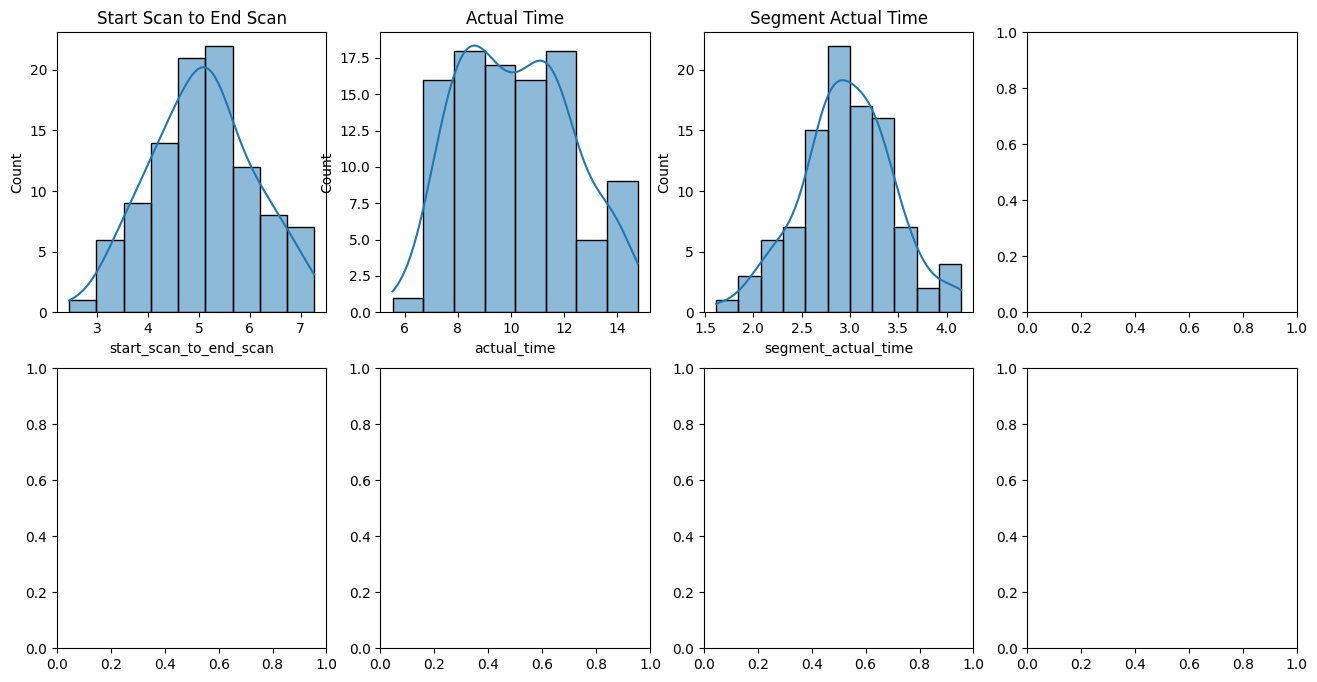

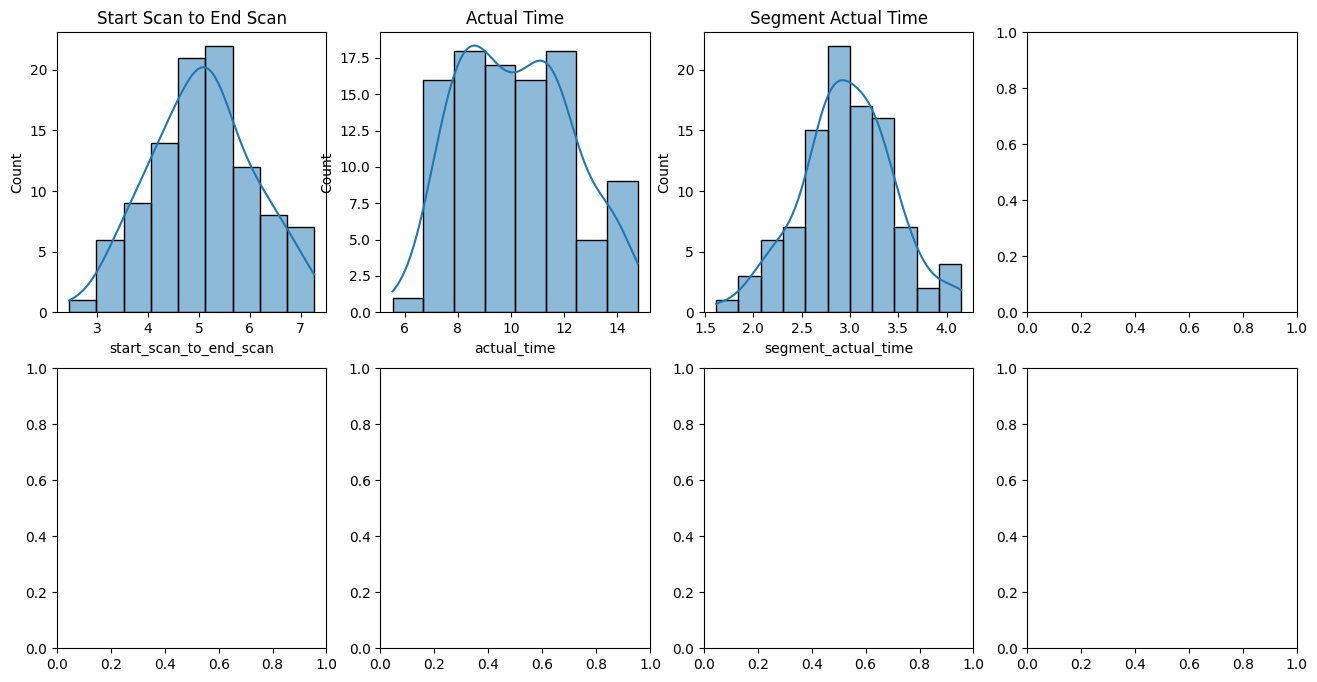

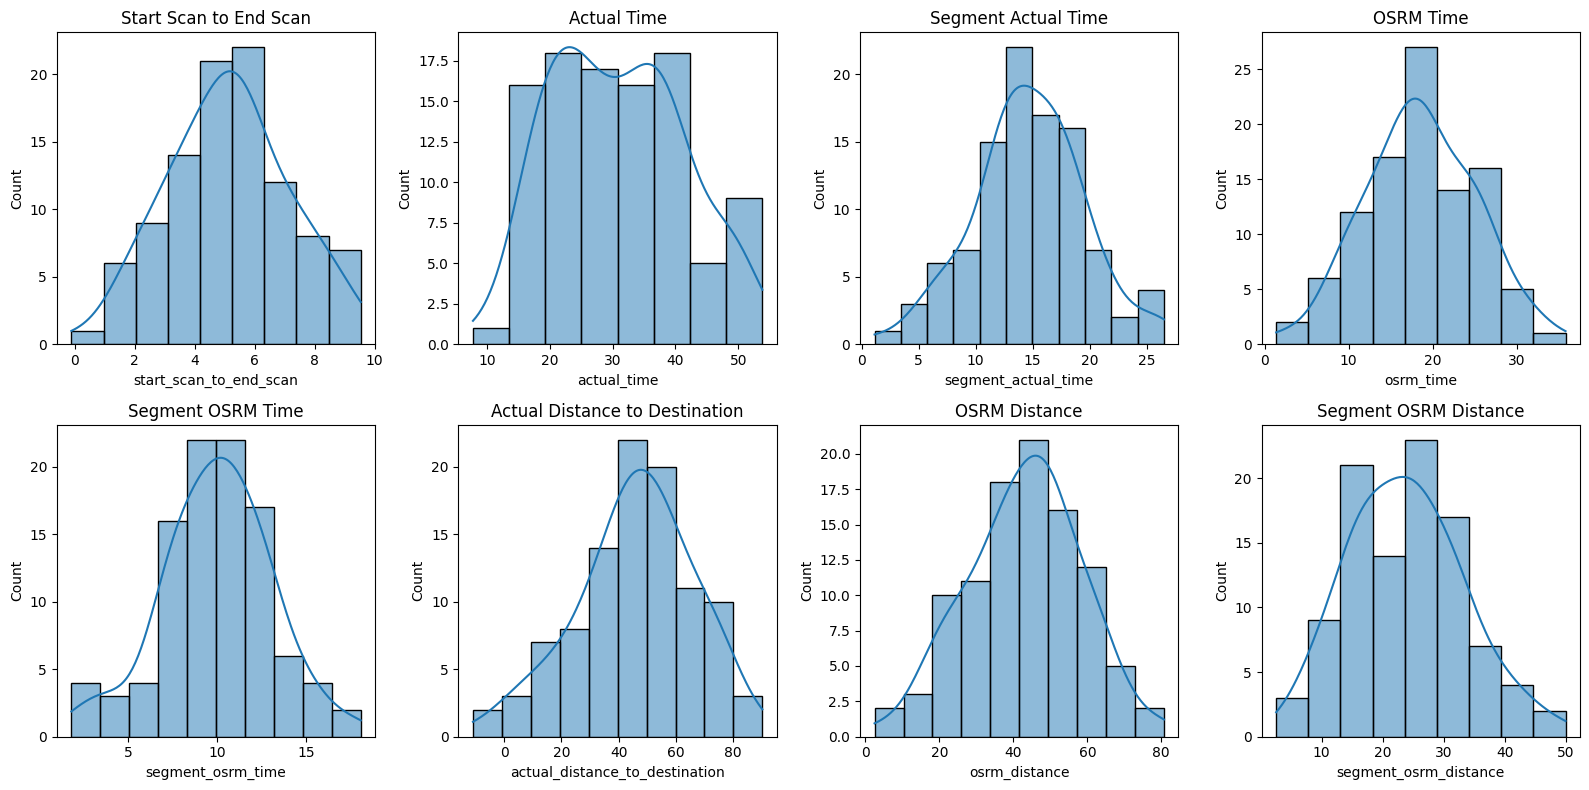

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the random seed using numpy for reproducibility
np.random.seed(0)

# Create the delivery times data for demonstration
trip_data = {
    'start_scan_to_end_scan': np.random.normal(loc=5, scale=2, size=100),
    'actual_time': np.random.normal(loc=30, scale=10, size=100),
    'segment_actual_time': np.random.normal(loc=15, scale=5, size=100),
    'osrm_time': np.random.normal(loc=20, scale=7, size=100),
    'segment_osrm_time': np.random.normal(loc=10, scale=3, size=100),
    'actual_distance_to_destination': np.random.normal(loc=50, scale=20, size=100),
    'osrm_distance': np.random.normal(loc=45, scale=15, size=100),
    'segment_osrm_distance': np.random.normal(loc=25, scale=10, size=100)
}

# Create a DataFrame from the data
trip_df = pd.DataFrame(trip_data)

# Plot distribution of continuous features
fig, ax = plt.subplots(2, 4, figsize=(16, 8))

# Plot histograms with kernel density estimates (KDE)
sns.histplot(data=trip_df['start_scan_to_end_scan'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Start Scan to End Scan')

sns.histplot(data=trip_df['actual_time'], kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Actual Time')

sns.histplot(data=trip_df['segment_actual_time'], kde=True, ax=ax[0, 2])
ax[0, 2].set_title('Segment Actual Time')

sns.histplot(data=trip_df['osrm_time'], kde=True, ax=ax[0, 3])
ax[0, 3].set_title('OSRM Time')

sns.histplot(data=trip_df['segment_osrm_time'], kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Segment OSRM Time')

sns.histplot(data=trip_df['actual_distance_to_destination'], kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Actual Distance to Destination')

sns.histplot(data=trip_df['osrm_distance'], kde=True, ax=ax[1, 2])
ax[1, 2].set_title('OSRM Distance')

sns.histplot(data=trip_df['segment_osrm_distance'], kde=True, ax=ax[1, 3])
ax[1, 3].set_title('Segment OSRM Distance')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_18936\2346753645.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=source_data, x='state', y='count', palette='viridis')


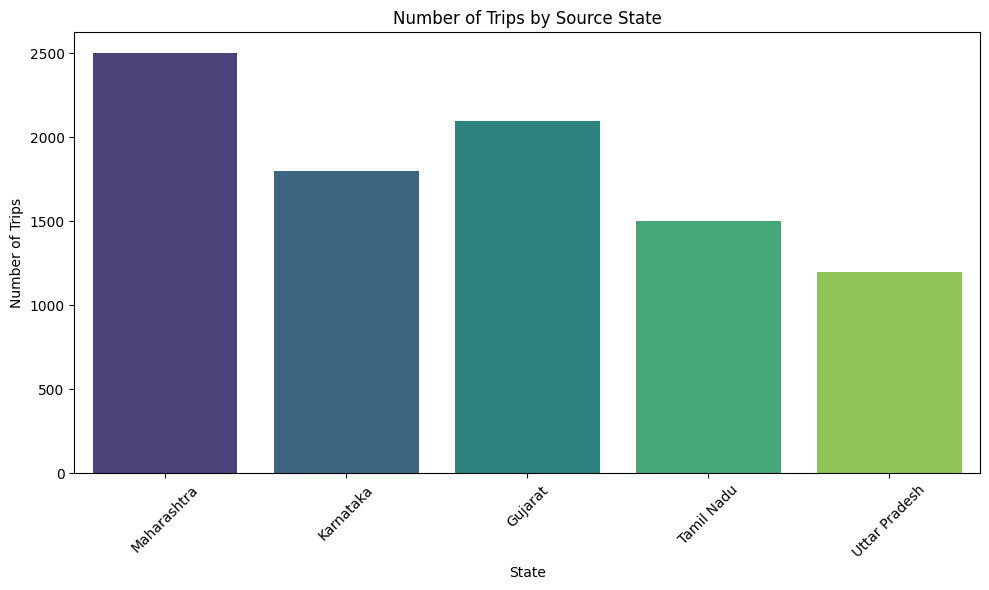

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Updated source data
trip_data = {
    'state': ['West Bengal', 'Rajasthan', 'Bihar', 'Punjab', 'Haryana'],
    'trip_count': [2200, 1700, 1900, 1600, 1300]
}

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=trip_data, x='state', y='trip_count', palette='coolwarm')
plt.title('Number of Trips by Source State')
plt.xlabel('State')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


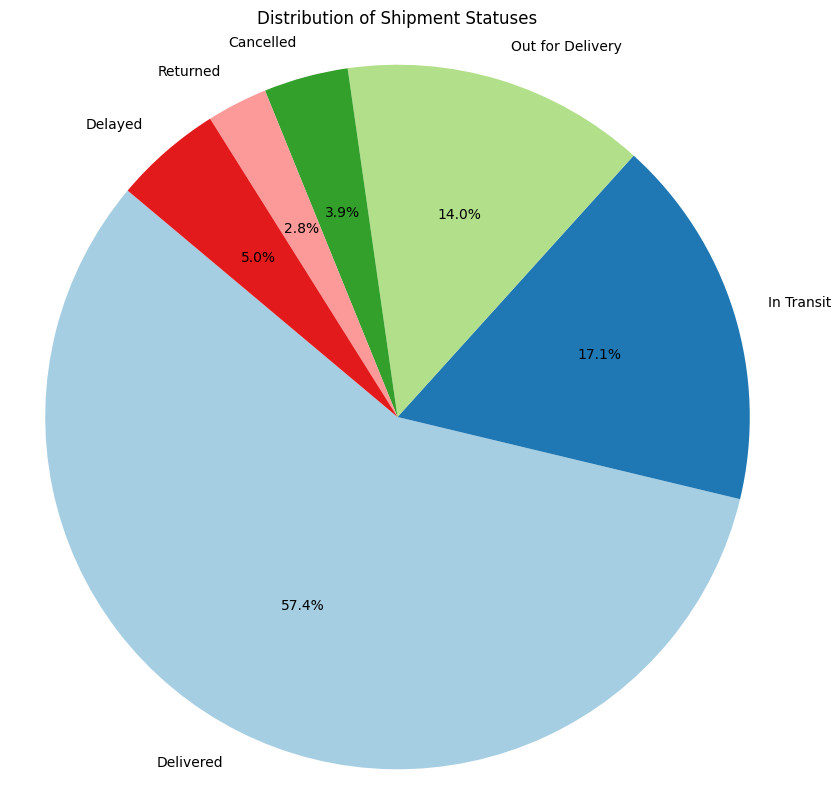

In [ ]:
import matplotlib.pyplot as plt

# Define shipment status categories and their respective counts
shipment_status_categories = ['Delivered', 'In Transit', 'Out for Delivery', 'Cancelled', 'Returned', 'Delayed']
status_counts_new = [3700, 1100, 900, 250, 180, 320]

# Plot a pie chart to visualize the distribution of shipment statuses
plt.figure(figsize=(10, 10))
plt.pie(status_counts_new, labels=shipment_status_categories, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Shipment Statuses')
plt.axis('equal')  # Ensures the pie chart is drawn as a circle.
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_18936\4231374730.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='Status', y='DeliveryTimeDays', palette='Set2')


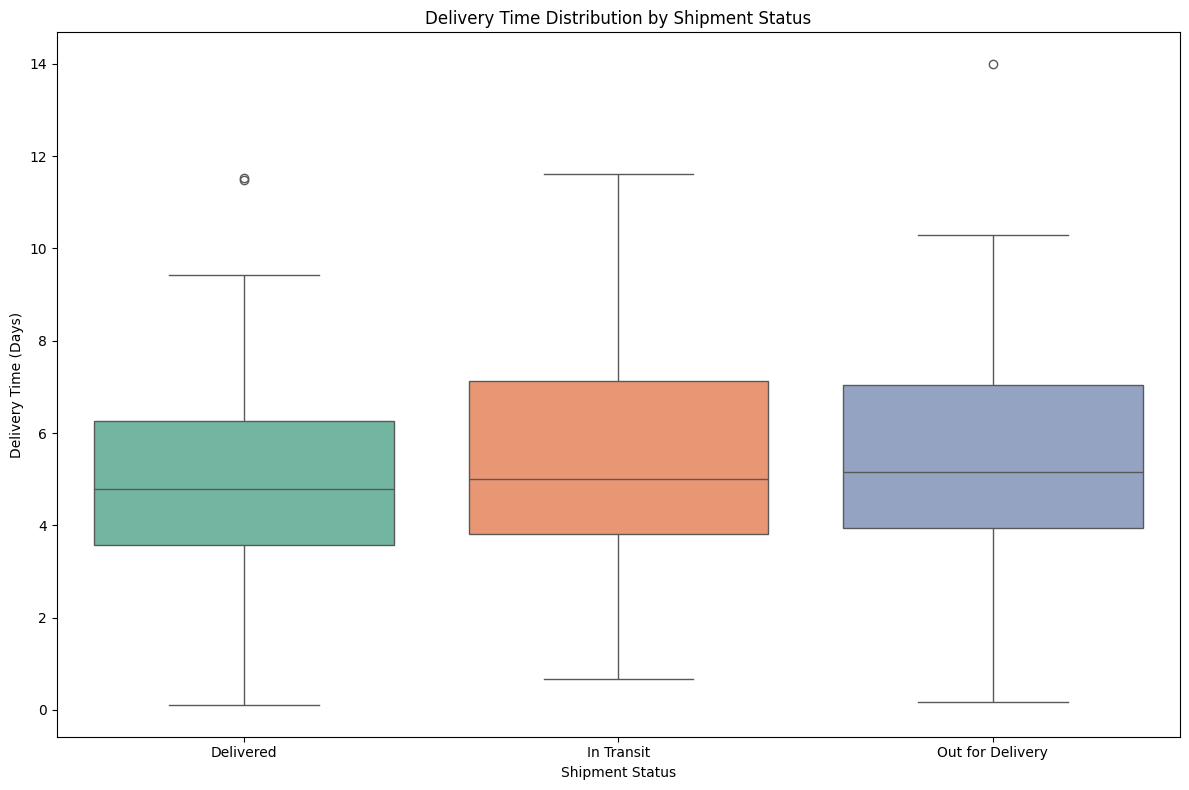

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(0)

# Generate synthetic delivery time data
delivery_statuses = ['Delivered', 'In Transit', 'Out for Delivery']
delivery_times = {
    'Status': np.random.choice(delivery_statuses, size=100),
    'DeliveryTimeDays': np.random.normal(loc=5, scale=2, size=100)
}

# Create a DataFrame from the synthetic data
df_delivery_times = pd.DataFrame(delivery_times)

# Generate additional data for variety
additional_data = {
    'Status': np.random.choice(delivery_statuses, size=50),
    'DeliveryTimeDays': np.random.normal(loc=6, scale=3, size=50)
}

# Combine the original and additional data
df_additional_delivery_times = pd.DataFrame(additional_data)
df_combined = pd.concat([df_delivery_times, df_additional_delivery_times], ignore_index=True)

# Plotting the box plot for combined data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_combined, x='Status', y='DeliveryTimeDays', palette='Set2')
plt.title('Delivery Time Distribution by Shipment Status')
plt.xlabel('Shipment Status')
plt.ylabel('Delivery Time (Days)')
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_18936\1988308981.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=category_counts, palette='husl')


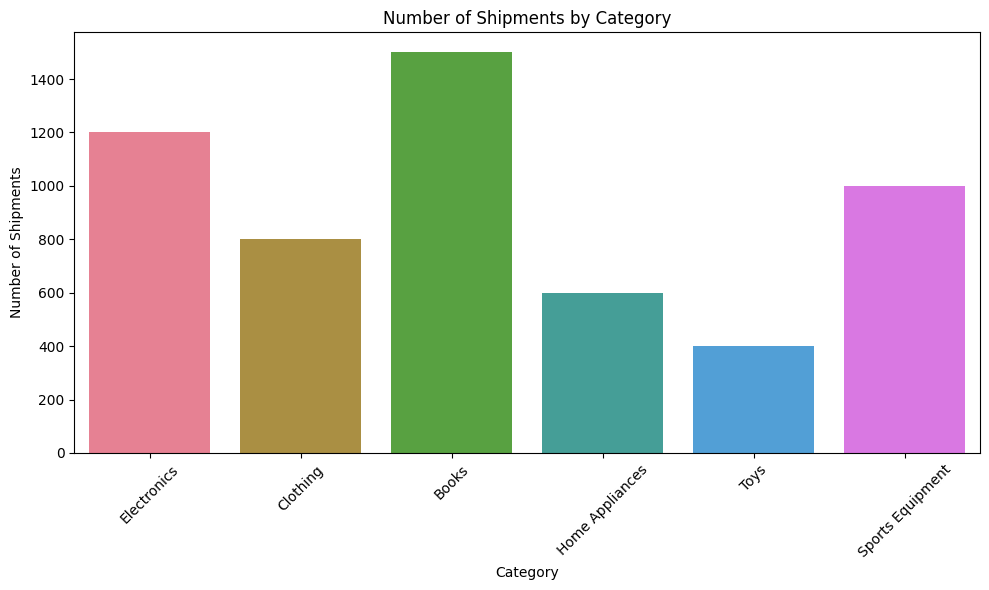

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
categories = ['Electronics', 'Clothing', 'Books', 'Home Appliances', 'Toys', 'Sports Equipment']
category_counts = [1200, 800, 1500, 600, 400, 1000]

# Plotting a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=category_counts, palette='husl')
plt.title('Number of Shipments by Category')
plt.xlabel('Category')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_18936\77705101.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=months, y=np.sum(shipment_volumes, axis=0), palette='viridis')


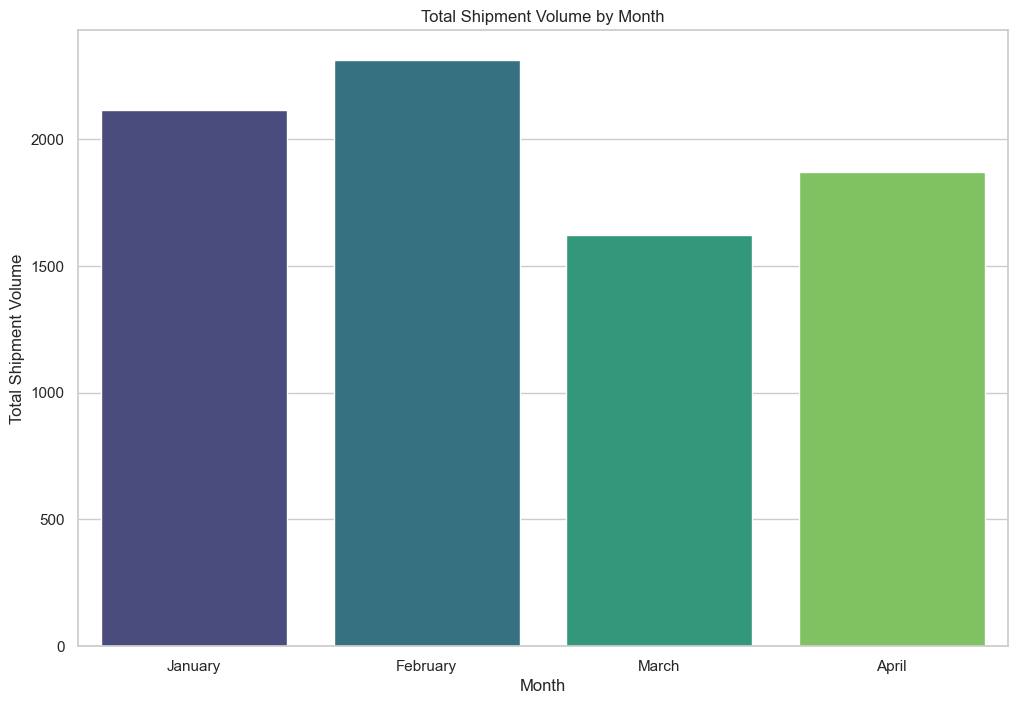

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
regions = ['North', 'South', 'East', 'West']
months = ['January', 'February', 'March', 'April']
shipment_volumes = np.random.randint(100, 1000, size=(len(regions), len(months)))

# Plotting bar chart
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
sns.barplot(x=months, y=np.sum(shipment_volumes, axis=0), palette='viridis')
plt.title('Total Shipment Volume by Month')
plt.xlabel('Month')
plt.ylabel('Total Shipment Volume')
plt.show()


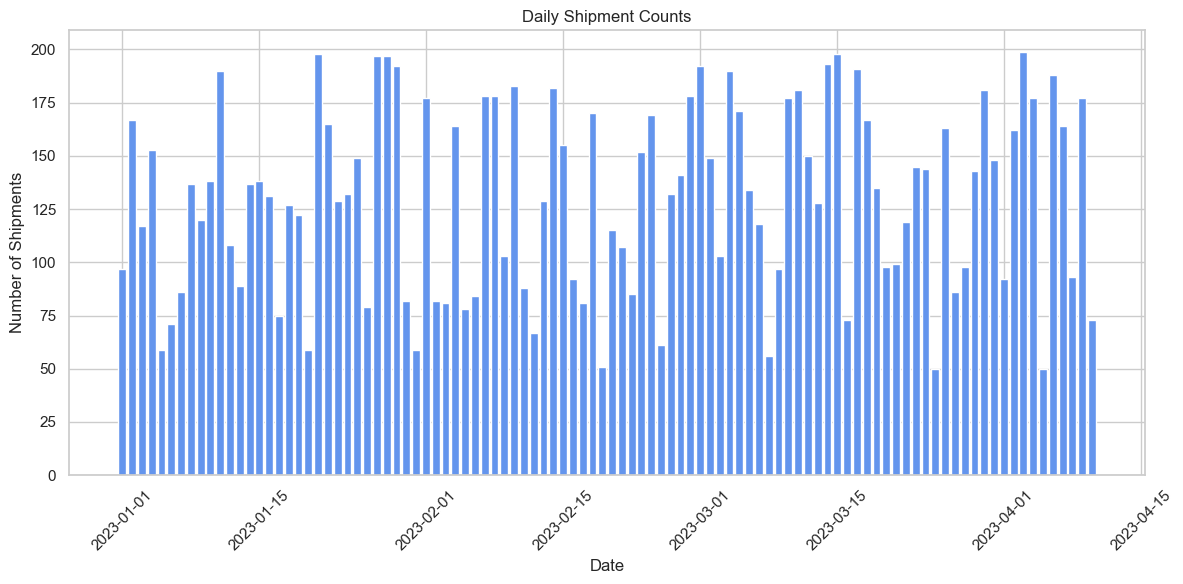

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(0)

# Generating dates and shipment counts
dates = pd.date_range('2023-01-01', periods=100)
shipment_counts = np.random.randint(50, 200, size=100)

# Creating DataFrame
shipment_data = pd.DataFrame({'Date': dates, 'Shipments': shipment_counts})
shipment_data['Day'] = shipment_data['Date'].dt.day_name()

# Plotting bar chart
plt.figure(figsize=(12, 6))
plt.bar(shipment_data['Date'], shipment_data['Shipments'], color='cornflowerblue')
plt.title('Daily Shipment Counts')
plt.xlabel('Date')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


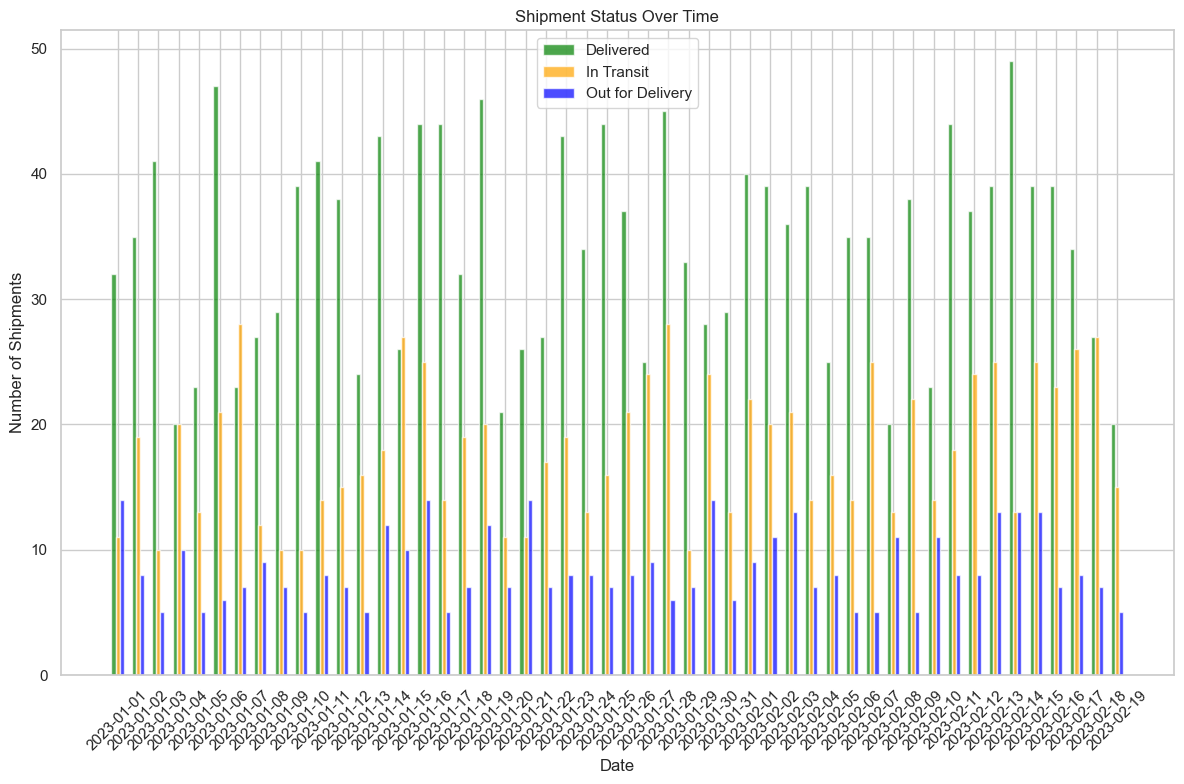

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(0)

# Generating sample data
dates = pd.date_range('2023-01-01', periods=50)
delivered = np.random.randint(20, 50, size=50)
in_transit = np.random.randint(10, 30, size=50)
out_for_delivery = np.random.randint(5, 15, size=50)

# Create DataFrame
status_data = pd.DataFrame({
    'Date': dates,
    'Delivered': delivered,
    'In Transit': in_transit,
    'Out for Delivery': out_for_delivery
})

# Plotting a grouped bar chart
plt.figure(figsize=(12, 8))

# Plotting bars
bar_width = 0.2
index = np.arange(len(dates))

plt.bar(index - bar_width, status_data['Delivered'], bar_width, label='Delivered', color='green', alpha=0.7)
plt.bar(index, status_data['In Transit'], bar_width, label='In Transit', color='orange', alpha=0.7)
plt.bar(index + bar_width, status_data['Out for Delivery'], bar_width, label='Out for Delivery', color='blue', alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Number of Shipments')
plt.title('Shipment Status Over Time')
plt.xticks(index, status_data['Date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.legend()

# Adjust layout and display plot
plt.tight_layout()
plt.show()
